## Adequate Energy Consumption Model

The world needs an adequate energy consumption model:

1. Due to its importance in reducing energy wastage
2. To support our economy 
3. For social progress
4. Build a better quality of life
and so on.

## Energy Outages

However, in today's time, we can see energy outages in developing countries as well as developed countries. Because of:

1.	Excess load consumed by appliances at home
2.	Heating and cooling appliances take most power in the house


## Automated Energy Consumption Prediction

In this era of Artificial Intelligence (AI), we can try a machine learning appliances prediction model to build an automated system for Appliance energy consumption and total energy prediction. Furthermore, with the advent of machine learning, accurately predicting future energy consumption becomes possible. Some of the reasons might be:
1.	In the age of smart homes, the ability to predict energy consumption can save money for end-user
2.	Help in generating money for the user by giving excess energy back to Grid 
3.	The company that work in IoT stream need an automated model to understand consumer behavior to help them make better decisions
4.	It can help us to evaluate building energy efficiency, conduct building commissioning, and detect and diagnose building system faults
5.	Providing opportunities to address the building’s energy demand and improve energy efficiency.

## Problem Statement

We should forecast appliances energy consumption for a residence based on factors such as temperature, humidity, and pressure. Due to the high-level prediction performance here,  a machine learning algorithm would be preferable. Specifically, a supervised learning model using regression algorithms will be suitable. 

## Dataset 

The dataset has been taken from the UCI Machine Learning repository.

Link: http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

The data set is at 10 min for about 4.5 months. The house temperature and
humidity conditions were monitored with a ZigBee wireless sensor network.
Each wireless node transmitted the temperature and humidity conditions
around 3.3 min. Then, the wireless data was averaged for
10 minutes’ periods. The energy data was logged every 10 minutes with m-bus
energy meters. Weather from the nearest airport weather station (Chievres
Airport, Belgium) was downloaded from a public data set from Reliable the prognosis (rp5.ru), and merged together with the experimental data sets using
the date and time column. Two random variables have been included in the
data set for testing the regression models and to filter out non-predictive
attributes (parameters). The dataset has 19375 instances and 29 attributes
, including predictors and the target variable.

### Features

There are 29 features to describe appliances energy use :
1.  date : time year-month-day hour:minute:second
2.  lights : energy use of light fixtures in the house in Wh
3.  T1 : Temperature in kitchen area, in Celsius
4.  T2 : Temperature in living room area, in Celsius
5.  T3 : Temperature in laundry room area
6.  T4 : Temperature in office room, in Celsius
7.  T5 : Temperature in bathroom, in Celsius
8.  T6 : Temperature outside the building (north side), in Celsius
9.  T7 : Temperature in ironing room, in Celsius
10. T8 : Temperature in teenager room 2, in Celsius
11. T9 : Temperature in parents’ room, in Celsius
12. T_out : Temperature outside (from Chievres weather station), in Celsius
13. Tdewpoint : (from Chievres weather station), Â°C
14. RH_1 : Humidity in kitchen area, in %
15. RH_2 : Humidity in living room area, in %
16. RH_3 : Humidity in laundry room area, in %
17. RH_4 : Humidity in office room, in %
18. RH_5 : Humidity in bathroom, in %
19. RH_6 : Humidity outside the building (north side), in %
20. RH_7 : Humidity in ironing room, in %
21. RH_8 : Humidity in teenager room 2, in %
22. RH_9 : Humidity in parents’ room, in %
23. RH_out :Humidity outside (from Chievres weather station), in %
24. Pressure : (from Chievres weather station), in mm Hg
25. Wind speed: (from Chievres weather station), in m/s
26. Visibility :(from Chievres weather station), in km
27. Rv1 :Random variable 1, non-dimensional
28. Rv2 :Random variable 2, non-dimensional
29. Appliances : Total energy used by appliances, in Wh

Here indicated, hourly data (then interpolated) from the nearest airport
weather station (Chievres Airport, Belgium) was downloaded from a public
data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable
Prognosis for the distribution of the 4.5 months of weather data.

### Our main goal should be to predict Appliance (appliances energy consumption). I will prove my point with several data analysis techniques.




# Appliance Energy Consumption Inspection

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import time
import dateutil
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('energydata_complete.csv') #read dataset

### Shape of the dataset 

In [3]:
print('shape of the dataset: ',df.shape)
print('The number of rows in dataset: ' , df.shape[0])
print('The number of columns in dataset: ' , df.shape[1])

shape of the dataset:  (19735, 29)
The number of rows in dataset:  19735
The number of columns in dataset:  29


In [4]:
df.head() # try to inspect first 5 rows of the dataset

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## Information of Variables 

In this section, I try to provide:
1. how many unique values does each variable or features have
2. how many missing values does each variable contain
3. type of variables 

In [5]:
#1. check the unque values per rows
df.apply(lambda x: len(x.unique()))

date           19735
Appliances        92
lights             8
T1               722
RH_1            2547
T2              1650
RH_2            3376
T3              1426
RH_3            2618
T4              1390
RH_4            2987
T5              2263
RH_5            7571
T6              4446
RH_6            9709
T7              1955
RH_7            5891
T8              2228
RH_8            6649
T9               924
RH_9            3388
T_out           1730
Press_mm_hg     2189
RH_out           566
Windspeed        189
Visibility       413
Tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

In [6]:
# 2. Checking Null Values per rows
df.apply(lambda x: sum(x.isnull()), axis=0)

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [7]:
# 3. types of variables 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

### Inference 
 1. There are 29 columns - 1 date time column, 2 Integer columns and 26 Float column
 2. Nearly 1 coulmn (Lights) is having less than 10 unique items, which can be considered as categorical column
 3. The dataset is very clean as I do not find any missing value
 4. Target variable: which is Appliances (appliances energy consumption in house) need to predicted by Machine Learning model
 5. In addition, we can merge Appliances (appliances energy consumption in the house) and Lights (lights energy consumption in the house) together to predict total energy consumption in house by Machine Learning model

## Few Insights of the Dataset

In [8]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### Observations:

Temperature columns are:"T1","T2","T3","T4","T5","T6","T7","T8","T9"

Humidity columns are: "RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"

1.	Temperature columns - Temperature inside the house varies between 14.89 Degree  & 29.85 Degree, temperature outside (T6) varies between -6.06 Deg to 28.29 Degree. The reason for this variation is sensors are kept outside the house
2.	Humidity columns - Humidity inside the house varies is between 20.60% to 63.36% with the exception of RH_5 (Bathroom) and RH_6 (Outside house), which varies between 29.82% to 96.32% and 1% to 99.9%, respectively.
3. It is expected a correlation between temperature/humidity and energy consumption. For instance, when someone cooks(higher consumption) probably the temperature in the kitchen raises.
4. Lights column - Initially, I believed the lights column would be able to give useful information. With 11438 0 (zero) entries in 14801 rows, this column will not add any value to the model. I believe light consumption and humidity level in a room will give an idea about human presence in the room and its impact on Appliance consumption.


## Feature Engineering
Feature engineering is useful to improve the performance of machine learning algorithms. Selecting the important features and reducing the size of the feature set makes computation in machine learning and data analytics algorithms more feasible.

Now, I will check for Outliers and remove extreme 1% of the data based on our target variable Appliances (appliances energy consumption in the house). 

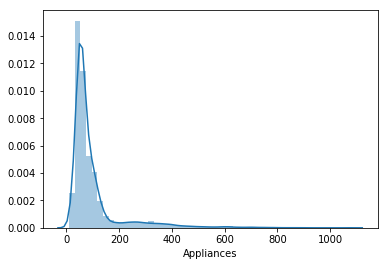

In [9]:
sns.distplot(df["Appliances"])

#### Observation About Appliances
Some of my observations about the target variable (the variable I want to predict):
1. The majority of the appliances energy consumption is in the range of 0 ~ 200 kWh
2. 75% of Appliance consumption is less than 100 Wh 
3. maximum consumption is 1080 Wh
4. There will be outliers in this column, and there are a small number of cases where consumption is very high

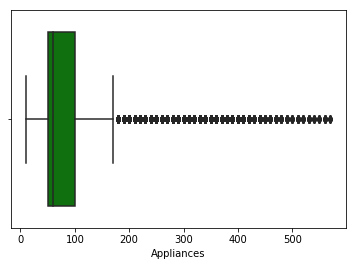

In [10]:
#removing outliers 
df = df[df['Appliances'].between(df['Appliances'].quantile(.0), df['Appliances'].quantile(.99))]
sns.boxplot(df["Appliances"],color="green")

## Ingesting new features to the dataset
Here, I create some new features from the date column.
#### The main idea behind this task: 
Appliances load is the hour, day, week, month dependent. It is a logical assumption that in night hours, the load is low, or at weekends the energy consumption is higher than the weekdays because more people are at home.

In [11]:
df["exact_date"]=df['date'].str.split(' ').str[0]

df["hours"]=(df['date'].str.split(':').str[0].str.split(" ").str[1]).astype(str).astype(int)
df["seconds"]=((df['date'].str.split(':').str[1])).astype(str).astype(int).mul(60)

df["week"]=(df['date'].str.split(' ').str[0])
df["week"]=(df['week'].apply(dateutil.parser.parse, dayfirst=True))
df["weekday"]=(df['week'].dt.dayofweek).astype(str).astype(int)
df["week"]=(df['week'].dt.day_name())

df['log_appliances'] = np.log(df.Appliances)
df['hour*lights'] = df.hours * df.lights
df['hour_avg'] = list(map(dict(df.groupby('hours')["Appliances"].mean()).get, df.hours))

df.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,rv1,rv2,exact_date,hours,seconds,week,weekday,log_appliances,hour*lights,hour_avg
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,13.275433,13.275433,2016-01-11,17,0,Tuesday,1,4.094345,510,141.919699
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.606195,18.606195,2016-01-11,17,600,Tuesday,1,4.094345,510,141.919699
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,28.642668,28.642668,2016-01-11,17,1200,Tuesday,1,3.912023,510,141.919699
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.410389,45.410389,2016-01-11,17,1800,Tuesday,1,3.912023,680,141.919699
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,10.084097,10.084097,2016-01-11,17,2400,Tuesday,1,4.094345,680,141.919699


### Weekend vs Weekday Appliances energy consumption?

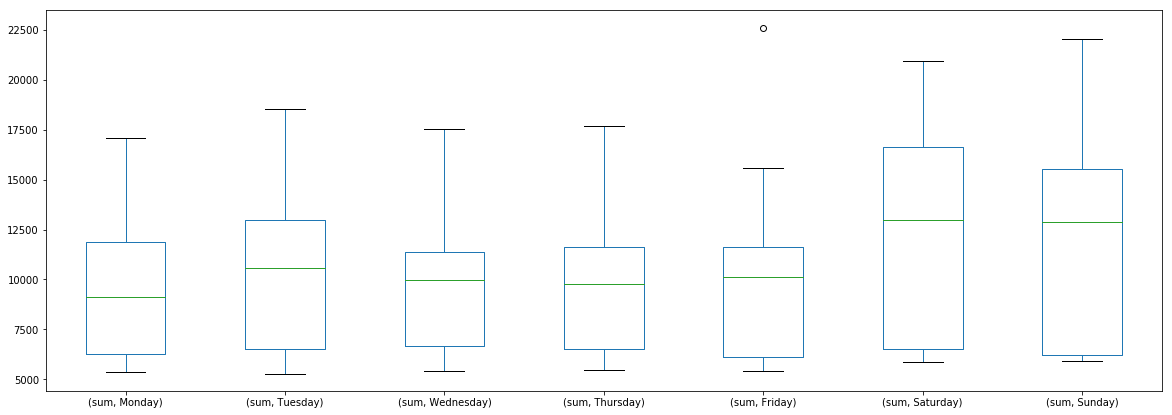

In [12]:
days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
arranged_day = pd.Categorical(df["week"], categories=days,ordered=True)
day_series = pd.Series(arranged_day)
table = pd.pivot_table(df,index=["hours"],
               values="Appliances",columns=day_series,
               aggfunc=[np.sum],fill_value=0)
table.plot.box(figsize=(20, 7))

#### Weekends (Saturdays and Sundays) are observed to have a high consumption of Electricity. (> 25% than Weekdays).

## Appliances mean energy consumptions per hour of a Particular day 

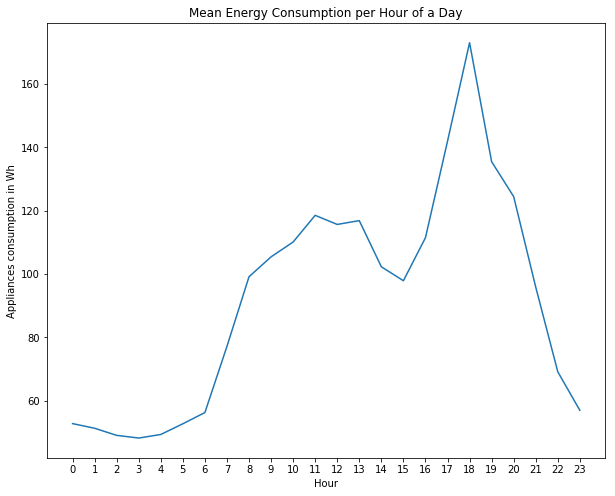

In [13]:
def hourly(x,df=df):
    return df.groupby('hours')[x].mean()

# Plot of Mean Energy Consumption per Hour of a Day
hourly('Appliances').plot(figsize=(10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks);

### Some Thoughts 
High Appliances electricity consumption of >140Wh is observed during evening hours 17:00 to 20:00. At night from 23:00-6:00, the power load is below 50Wh, meaning that most appliances are off or standby. Between 9:00-13:00, the power load is >100Wh, and after launch reduces again to <100Wh. In the afternoon, the energy consumption ranges from 130-185Wh as family members are at home and many devices are on.

## Pearson Correlation among the variables

In [14]:
df.columns.values

array(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7',
       'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'exact_date',
       'hours', 'seconds', 'week', 'weekday', 'log_appliances',
       'hour*lights', 'hour_avg'], dtype=object)

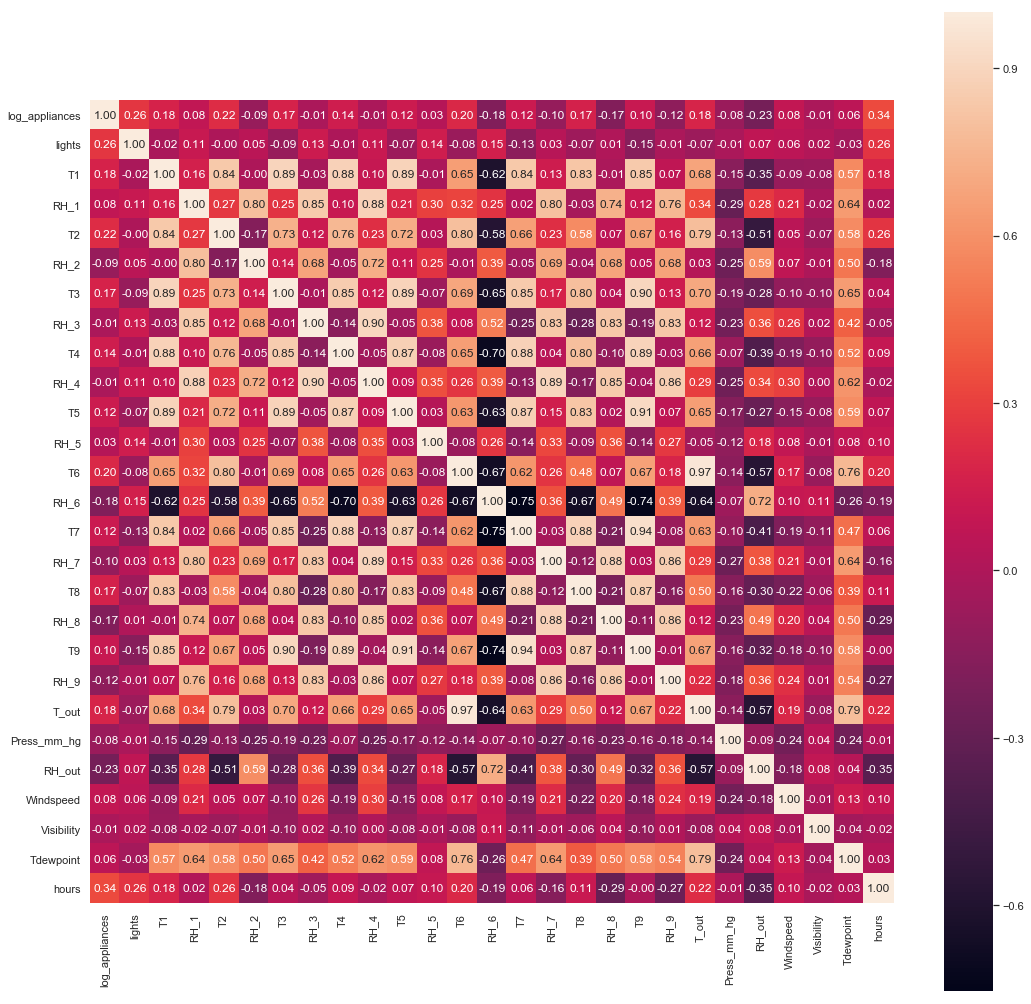

In [15]:
# Pearson Correlation among the variables
col = ['log_appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7',
       'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
       'Windspeed', 'Visibility', 'Tdewpoint', 'hours']
corr = df[col].corr()
plt.figure(figsize = (18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show()

The Appliances energy consumption is highly correlated with:
1. Hours: 0.34
2. Lights: 0.26
3. T2 (Temperature in living room area): 0.22
4. T6 (Temperature outside the building (north side)): 0.20

Also, all-temperature values inside the house are highly correlated with each other (> 0.8)


#### To sum up, here I make an effort to show that why Appliances ( Total energy used by appliances) is the most most important for prediction or why it should be our target variable. Through several data analysis procedures, I want to validate my point. Moreover, by applying some visualization, I show that why Total energy consumption by a household would be the most valuable variable to predict.